In [1]:
#importing liberaries

import pandas as pd 
from pandas import Series, DataFrame
import numpy as np 
from scipy.stats import beta, norm, expon, gamma, uniform
import matplotlib.pyplot as plt 

# 1. Load The Data

In [2]:
# Loading Data
df = pd.read_csv("cryptocurrency.csv")
df

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752","824,588,509"
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224","853,213,342"
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,"27,574,097","817,872,179"
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567","828,296,390"
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667","879,181,680"
...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0,"58,287,979"
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0,"65,604,596"
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0,"74,020,918"
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0,"75,388,964"


# 2. Print head and tail

In [3]:
# print head and tail of the data
print("\nTop 5 columns\n\n",df.head())
print("\nLast 5 columns\n",df.tail())


Top 5 columns

   Currency          Date  Open  High   Low Close      Volume   Market Cap
0    tezos  Dec 04, 2019  1.29  1.32  1.25  1.25  46,048,752  824,588,509
1    tezos  Dec 03, 2019  1.24  1.32  1.21  1.29  41,462,224  853,213,342
2    tezos  Dec 02, 2019  1.25  1.26  1.20  1.24  27,574,097  817,872,179
3    tezos  Dec 01, 2019  1.33  1.34  1.25  1.25  24,127,567  828,296,390
4    tezos  Nov 30, 2019  1.31  1.37  1.31  1.33  28,706,667  879,181,680

Last 5 columns
          Currency          Date  Open  High   Low Close Volume  Market Cap
28939  bitcoin-sv  May 02, 2013  3.78  4.04  3.01  3.37      0  58,287,979
28940  bitcoin-sv  May 01, 2013  4.29  4.36  3.52  3.80      0  65,604,596
28941  bitcoin-sv  Apr 30, 2013  4.40  4.57  4.17  4.30      0  74,020,918
28942  bitcoin-sv  Apr 29, 2013  4.37  4.57  4.23  4.38      0  75,388,964
28943  bitcoin-sv  Apr 28, 2013  4.30  4.40  4.18  4.35      0  74,636,938


In [4]:
# getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Currency    28944 non-null  object
 1   Date        28944 non-null  object
 2   Open        28944 non-null  object
 3   High        28944 non-null  object
 4   Low         28944 non-null  object
 5   Close       28944 non-null  object
 6   Volume      28944 non-null  object
 7   Market Cap  28944 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [5]:
# checking null values in data
df.isnull().sum()

Currency      0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

# 3. Market Cap Column: Remove comma sign and store the values as integer

In [6]:
# Removing the comma sign from a Market Cap Column!!!
df['Market Cap'] = df['Market Cap'].str.replace(',','')
df

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752",824588509
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224",853213342
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,"27,574,097",817872179
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567",828296390
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667",879181680
...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0,58287979
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0,65604596
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0,74020918
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0,75388964


In [7]:
# Converting its data type to int
df['Market Cap'] = df['Market Cap'].astype('int64')
df

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752",824588509
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224",853213342
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,"27,574,097",817872179
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567",828296390
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667",879181680
...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0,58287979
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0,65604596
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0,74020918
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0,75388964


In [8]:
df.dtypes

Currency      object
Date          object
Open          object
High          object
Low           object
Close         object
Volume        object
Market Cap     int64
dtype: object

# 4. Calculate for nnlf using beta, norm , expon, gamma, uniform distributions

In [9]:
data = df['Market Cap']

# nnlf for beta distribution!
bfit = beta.fit(data)
bnnlf = beta.nnlf(bfit, data)
print("beta fit = ",bfit,"\n nnlf for beta distribution = ",bnnlf)

# nnlf for normal distribution!
nfit = norm.fit(data)
normal_nnlf = beta.nnlf(bfit, data)
print("\n\nnormal fit = ",nfit,"\n nnlf for normal distribution = ",normal_nnlf)

# nnlf for exponentional distribution!
efit = expon.fit(data)
ennlf = expon.nnlf(efit,data)
print("\n\nexponential fit = ",efit,"\n nnlf for exponential distribution = ",ennlf)

# nnlf for gamma distribution!
gfit = gamma.fit(data)
gnnlf = gamma.nnlf(gfit,data)
print("\n\ngamma fit = ",gfit,"\n nnlf for gamma distribution = ",gnnlf)

# nnlf for uniform Distribution!
ufit = uniform.fit(data)
unnlf = uniform.nnlf(ufit,data)
print("\n\nuniform fit = ",ufit,"\n nnlf for uniform distribution = ",unnlf)

beta fit =  (0.49151017209289893, 395.5859179735023, -1.5731861743900667e-16, 1158403630187.1653) 
 nnlf for beta distribution =  685195.1758235123


normal fit =  (7194826309.602543, 24692797165.11664) 
 nnlf for normal distribution =  685195.1758235123


exponential fit =  (0.0, 7194826309.602543) 
 nnlf for exponential distribution =  685875.2018903042


gamma fit =  (0.17963813237668522, -7.177887576108436e-21, 89369168333.30505) 
 nnlf for gamma distribution =  636483.7835747075


uniform fit =  (0.0, 326502485530.0) 
 nnlf for uniform distribution =  767354.7431599098


# 5. Plot the bar plot for showing distributions and nnlf

<BarContainer object of 5 artists>

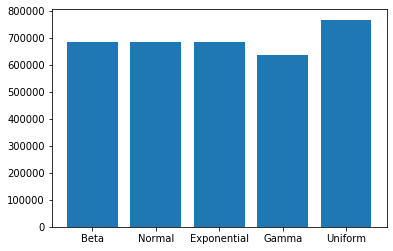

In [10]:
bar_data = [bnnlf, normal_nnlf, ennlf, gnnlf, unnlf]
label = ["Beta", "Normal", "Exponential", "Gamma", "Uniform"]
plt.bar(label,bar_data)

# 6. Print the distribution with minimum nnlf

In [13]:
a = bar_data.index(min(bar_data))
print("Distribtion with min nnlf is : ",bar_data[a])
print("***Exponential Distribution has minimum nnlf***")

Distribtion with min nnlf is :  636483.7835747075
***Exponential Distribution has minimum nnlf***


# Summary
"""
- At first we added important liberaries which we will use
- we loaded the data
- we print head and tail of the data to get a little overview of the data
- after it we print the info of data and checked whether it has null values or not.
            
            It does't have null values.....

- Then we removed the comma from the column 'Market Cap' and converted its data type to int64
- Then we calculated the nnlf for beta, normal, expon, gamma, uniform distribution
- After it we plotted the bar graph to show the distributions and nnlf
- At the last part we print the distribution with minimum nnlf
